<a href="https://colab.research.google.com/github/ananyagoyal1/Machine-Learning/blob/main/KNN_AND_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **KNN**

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import math
import operator

In [ ]:
url = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'
df = pd.read_csv(url)  # Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})  # Label values - 1 for Malignant and 2 for Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Cpying values of diagnosis to newly clreated labels column
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Dropping unncessary columns
df.head()  #Displaying first five rows of the dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
np.random.seed(1)
msk = np.random.rand(
    len(df)) < 0.7  #An array containing True(with probability 0.7) and False
train = df[msk]  #Rows having array value true
test = df[~msk]  #Rows having array value False
print('Number of observations in the training data: ', len(train))
print('Number of observations in the test data: ', len(test))

Number of observations in the training data:  395
Number of observations in the test data:  174


In [ ]:
train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


In [ ]:
test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,1
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,2
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,2
24,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,...,31.56,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564,1


In [ ]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [ ]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []  #List to store all the distance values
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)  #Calculating the Euclidean Distance
        distances.append((trainingSet[x],dist))  #Appending the distance values to the 'distance' list
    distances.sort(key=operator.itemgetter(1))  #Sorting based on the disance value
    neighbors = []  #List to store all the neighbors
    for x in range(k):
        neighbors.append(distances[x][0])  #Number of neighbors is dependent on the value of k
    return neighbors

In [ ]:
def getResponse(neighbors):
    classVotes = {}  #Dictionary to store labels with their counts
    for x in range(len(neighbors)):
        response = neighbors[x][-1]  #Label value of the neighbors
        if response in classVotes:
            classVotes[
                response] += 1  #if label value is already present increment it by 1
        else:
            classVotes[
                response] = 1  #If the label value is not yet present add it to the dictionary
    sortedVotes = sorted(
        classVotes.items(), key=operator.itemgetter(1), reverse=True
    )  #Sort the dictinary based on the count value in descending order
    return sortedVotes[0][
        0]  #Return the label with highest number of occurences

In [ ]:
#calculating the accuracy
def getAccuracy(testSet, predictions):
    correct = 0  #Variable to store the correct predictions
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:  #Checking whether the predicted value is same as label value
            correct += 1  #Incremented when both values are same
    return (correct / float(len(testSet))) * 100.0  #Accuracy = No. of Correct pred / Total number of pred

In [ ]:
#implementation on smaller dataset
trainSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2],
            [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
testInstance = [4, 8, 6, 4, 3, 4, 10, 6, 1, 2]
k = 1
neighbors = getNeighbors(trainSet, testInstance, k)
print(neighbors)

[[5, 1, 1, 1, 2, 1, 3, 2, 1, 2]]


In [ ]:
neighbors = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
             [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
response = getResponse(neighbors)
print(response)

2


In [ ]:
testSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
           [10, 10, 10, 10, 5, 10, 10, 10, 7, 4]]
predictions = [2, 2, 2]
accuracy = getAccuracy(testSet, predictions)
print(accuracy)
testSet = [[5, 1, 1, 1, 2, 1, 3, 2, 1, 2], [3, 1, 1, 1, 2, 1, 2, 3, 1, 2],
           [10, 10, 10, 10, 5, 10, 10, 10, 7, 10]]
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666
66.66666666666666


In [ ]:
predictions = []  #List to store the predicted values
k = 3  # 3-Nearest Neighbors
trainingSet = train.values.tolist()  #List containing training data
testSet = test.values.tolist()  #List containing test data
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)  # Storing the predicted values
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=2.0, act

CONFUSION MATRIX:

In [ ]:
print("Confusion Matrix")
y_test = []
for i in testSet:
    y_test.append(i[30])
from sklearn.metrics import confusion_matrix, accuracy_score
res = confusion_matrix(y_test, predictions)
print(res)

Confusion Matrix
[[ 52   5]
 [  6 111]]


In [ ]:
accuracy = accuracy_score(y_test, predictions) * 100
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 93.67816091954023%


## **SOM**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=347e1d1ff6ef87cc24ebb73f3ad48095ecf5732928db3ef9e326ddb80d5c2e84
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [ ]:
# Getting Data
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "High_Thrash.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/VictorPetch/Baby-Cry/master/"
DATA_URL = DOWNLOAD_ROOT  + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, file_to_download=FILE_TO_DOWNLOAD):

  urllib.request.urlretrieve(data_url,file_to_download)


fetch_data()

# observando se o diretório datasets foi criado com sucesso
!ls Low_High_Thrash.csv

ls: cannot access 'Low_High_Thrash.csv': No such file or directory


In [ ]:
# Importing the dataset
dataset = pd.read_csv(FILE_TO_DOWNLOAD)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


dataset.head()


,Files,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,Class
0,BellyPain05,2480.263158,2297.222222,2384.795322,2303.801170,2497.514620,2242.982456,2368.421053,2494.152047,2467.836257,...,2402.192982,2244.152047,2396.345029,2472.222222,2310.233918,2470.467836,2478.801170,2492.105263,2258.040936,0
1,BellyPain06,1219.648094,1219.501466,1219.354839,1217.302053,1220.087977,1213.929619,1214.516129,2421.114370,2421.260997,...,1214.662757,1219.208211,1212.023460,2383.431085,2311.583578,1212.756598,1214.076246,2421.994135,2420.967742,0
2,BellyPain08,1301.169591,1298.391813,841.812865,1298.830409,1326.169591,1312.134503,829.093567,1293.713450,843.128655,...,1330.263158,860.964912,1368.421053,1299.269006,1364.619883,1308.187135,1298.684211,1328.801170,843.274854,0
3,Cold_Hot08,2177.339181,2177.631579,2176.900585,2176.461988,2177.192982,2176.754386,2177.046784,2177.777778,2177.923977,...,2178.508772,2226.608187,2325.730994,2180.701754,2326.461988,2179.532164,2178.947368,2175.877193,2325.146199,0
4,Cold_Hot09,827.927928,828.528529,859.609610,865.465465,904.204204,827.177177,834.834835,859.459459,828.678679,...,845.795796,901.351351,892.642643,840.090090,872.972973,856.156156,859.159159,903.603604,799.699700,0


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
#z = sc.fit_transform(z)


In [ ]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 12, y = 12, input_len = 20, sigma = 1.0, learning_rate = 0.5)



In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
from numpy import subtract
from scipy import linalg
import minisom

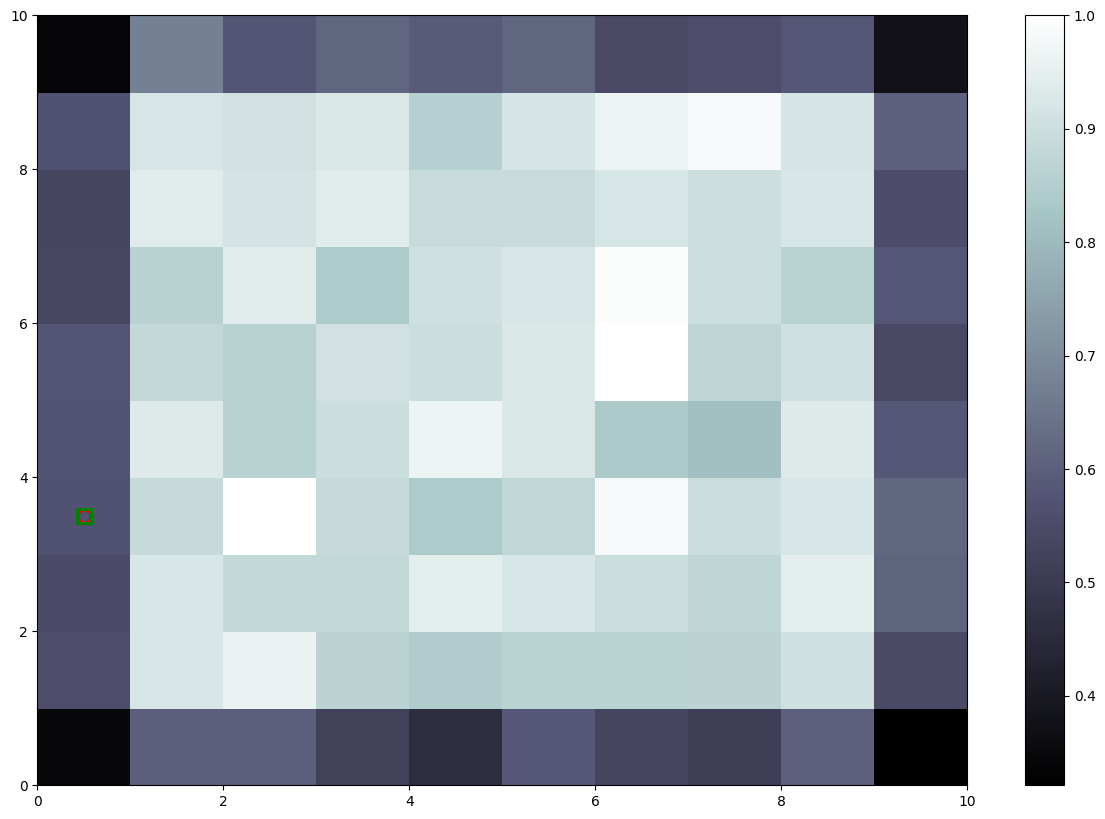

In [ ]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)



# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):

    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

In [ ]:
z = 858.9939024390244, 858.8414634146342, 859.1463414634146, 859.451219512195, 858.6890243902438, 876.0670731707316, 859.6036585365854, 859.2987804878048, 860.9756097560976, 876.9817073170732, 875.9146341463414, 862.6524390243902, 876.8292682926829, 862.3475609756098, 862.5, 859.7560975609756, 880.030487804878, 860.8231707317073, 861.1280487804878, 896.951219512195
w = som.winner(z)
print(w)

(0, 3)
